In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
def root(links,x):
    #find the roots of a label in the links
    while (links[x] != x):
        x = links[x]
    return x

def union(links,x,y):
    #unite two colliding clusters with different labels attached to them
    links[root(links,x)] = root(links,y)

In [3]:
def clustering(lattice,n,m):
    #cluster the particles in the lattice
    
    ll = 0 #current largest label that we used to characterise the clusters
    
    #I have to start with a zero in it so that the lengths will be okay
    links = [0]
    
    #iterate through the lattice
    for y in range(n):
        for x in range(m):
            
            #if there is a particle at the point that we need to cluster
            if lattice[y,x] == 1:

            #if the site is occupied

                #if we are at the upper boundary 
                if y == 0:
                    up = 0
                else:
                    up = lattice[y-1,x]

                if x == 0:
                    left = 0
                else: 
                    left = lattice[y,x-1]


                if left == 0 and up == 0: #there are no neighbours, this is a new cluster
                    ll += 1 #increase largest cluster label
                    lattice[y,x] = ll #add the label to the new cluster
                    links.append(ll)
                elif left != 0 and up == 0: #one neighbour above 
                    lattice[y,x] = root(links,left)
                elif left == 0 and up != 0: #one neighbour to the left
                    lattice[y,x] = root(links,up)
                else: #there are both neighbours to the left and above 
                    union(links,left,up)
                    lattice[y,x] = root(links,left)
                    
    #return the clustered lattice and the links 
    return lattice, links

In [4]:
#lets do a test
n = 5
m = 5

p = 0.5

In [5]:
lattice = (np.random.choice([0,1], size = n*m, p = [1-p,p])).reshape((n,m))

In [6]:
lattice

array([[1, 0, 0, 0, 1],
       [0, 1, 1, 0, 0],
       [1, 0, 1, 1, 1],
       [1, 1, 0, 1, 0],
       [1, 1, 0, 1, 0]])

In [7]:
lattice, links = clustering(lattice,n,m)

In [8]:
lattice

array([[1, 0, 0, 0, 2],
       [0, 3, 3, 0, 0],
       [4, 0, 3, 3, 3],
       [4, 4, 0, 3, 0],
       [4, 4, 0, 3, 0]])

In [9]:
links

[0, 1, 2, 3, 4]

Clustering looks okay.

Now we make a method to measure the size of clusters

In [10]:
def measure_clusters(lattice, links, n, m):
    #measure the size of clusters
    
    #contain here the sizes of the clusters
    sizes = np.zeros(n*m)
    
    #iterate through the lattice
    for y in range(n):
        for x in range(m):
            #num is the value of the lattice at point x,y
            num = lattice[y,x]
            
            #if this number is not zero, thus there is a particle at this point in the lattice
            if num != 0: 
                sizes[root(links,num)] += 1 #add a point to this given root 
    
    compressed_data = []
    for idx, size in enumerate(sizes):
        if size != 0: #if there is a cluster with that given label attached to it
            #we want to store the size of the cluster but we dont care about the labels at this point
            compressed_data.append(size)
            
    return np.array(compressed_data)

In [11]:
sizes = measure_clusters(lattice,links,n, m)

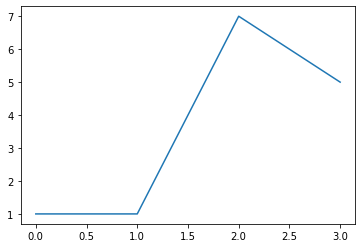

In [12]:
plt.plot(sizes)

In [13]:
def max_mean(sizes):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        max_size = np.max(sizes)
        mean_size = np.mean(sizes[sizes<max_size])
    if len(sizes[sizes<max_size]) == 0: 
        mean_size = 0
    else: 
        mean_size = np.mean(sizes[sizes<max_size])
    return max_size, mean_size

In [14]:
def max_mean(sizes):
    max_size = np.max(sizes)
    
    if len(sizes[sizes<max_size]) == 0: 
        mean_size = 0
    else: 
        mean_size = np.mean(sizes[sizes<max_size])
        
    return max_size, mean_size

In [15]:
def phase_transition(n, m, ps, itnum):
    
    maxs = np.zeros(len(ps))
    means = np.zeros(len(ps))
    
    for idx,p in enumerate(ps):
        for it in range(itnum):

            #create random lattice
            lattice = (np.random.choice([0,1], size = n*m, p = [1-p,p])).reshape((n,m))
            
            #carry out the clustering 
            lattice, links = clustering(lattice = lattice, n = n, m = m)

            #measure the clusters
            sizes = measure_clusters(lattice = lattice, links = links, n = n, m = m)

            #find the maximal cluster size and the mean cluster size (without the largest)
            max_size, mean_size = max_mean(sizes = sizes)
            
            maxs[idx] += max_size/itnum #add the max_size to the maxs list weighted by itnum
            means[idx] += mean_size/itnum
            
    return maxs,means

In [16]:
ps = np.linspace(0.05,0.95,20)

itnum = 100

n = 50
m = 50

ma,me = phase_transition(n = n, m = m, ps = ps, itnum = itnum)

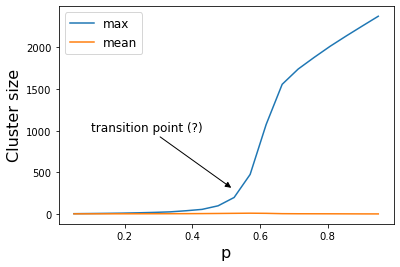

In [17]:
fig = plt.figure()

plt.plot(ps,ma, label = "max")
plt.plot(ps,me, label = "mean")

plt.xlabel("p",fontsize = 16)
plt.ylabel("Cluster size",fontsize = 16)

plt.annotate(r"transition point (?)", 
             xy=(0.52, 300), 
             xytext=(0.1, 1000), 
             arrowprops=dict(facecolor='black', arrowstyle='-|>'),fontsize = 12)
plt.legend(fontsize = 12)
plt.show()